<a href="https://colab.research.google.com/github/ssreeramj/market-mix-modeling-practice/blob/main/market_mix_modeling_create_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# If you don't have remotes installed yet, first run this line:
install.packages("remotes")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
# install siMMMulator
remotes::install_github(
    repo = "facebookexperimental/siMMMulator"
)

munsell    (0.5.0  -> 0.5.1  ) [CRAN]
farver     (2.1.1  -> 2.1.2  ) [CRAN]
isoband    (0.2.6  -> 0.2.7  ) [CRAN]
gtable     (0.3.4  -> 0.3.5  ) [CRAN]
expm       (NA     -> 0.999-9) [CRAN]
mvtnorm    (NA     -> 1.2-4  ) [CRAN]
tidyselect (1.2.0  -> 1.2.1  ) [CRAN]
ggplot2    (3.4.4  -> 3.5.1  ) [CRAN]
msm        (NA     -> 1.7.1  ) [CRAN]
data.table (1.15.0 -> 1.15.4 ) [CRAN]


Installing 10 packages: munsell, farver, isoband, gtable, expm, mvtnorm, tidyselect, ggplot2, msm, data.table

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpjsFQpv/remotesfe7ac8bb2/facebookexperimental-siMMMulator-da44d9a/DESCRIPTION’ ... OK
* preparing ‘siMMMulator’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘siMMMulator_1.1.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(siMMMulator)

In [4]:
my_variables <- step_0_define_basic_parameters(years = 2,
                                               channels_impressions = c("Facebook", "TV"),
                                               channels_clicks = c("Search"),
                                               frequency_of_campaigns = 1,
                                               true_cvr = c(0.001, 0.002, 0.003),
                                               revenue_per_conv = 1,
                                               start_date = "2017/1/1"
)

[1] "You have just run step 0: Defining Basic Parameters"
[1] "To confirm what you have input: "
[1] "Years of Data to generate :  2"
[1] "Channel that use impressions :  Facebook"
[2] "Channel that use impressions :  TV"      
[1] "Channel that use clicks :  Search"
[1] "How frequently campaigns occur :  1"
[1] "True CVRs of a channel (in order of channels you specified) :  0.001"
[2] "True CVRs of a channel (in order of channels you specified) :  0.002"
[3] "True CVRs of a channel (in order of channels you specified) :  0.003"
[1] "Revenue per conversion :  1"
[1] "Date the data set will start with :  2017-01-01"


In [5]:
df_baseline <- step_1_create_baseline(
                        my_variables = my_variables,
                        base_p = 500000,
                        trend_p = 1.8,
                        temp_var = 8,
                        temp_coef_mean = 50000,
                        temp_coef_sd = 5000,
                        error_std = 100000)

[1] "You have completed running step 1: generating baseline sales."


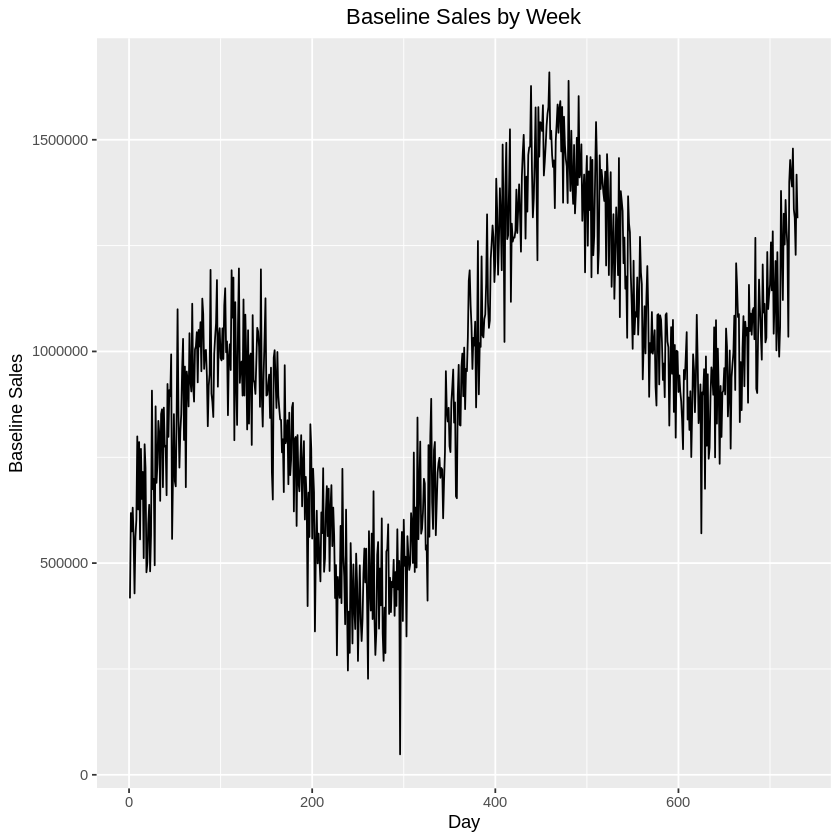

In [6]:
optional_step_1.5_plot_baseline_sales(df_baseline = df_baseline)


In [8]:
df_ads_step2 <- step_2_ads_spend(
                    my_variables = my_variables,
                    campaign_spend_mean = 329000,
                    campaign_spend_std = 100000,
                    max_min_proportion_on_each_channel <- c(0.45, 0.55,
                                                            0.15, 0.25)
                )

[1] "You have completed running step 2: Simulating ad spend."


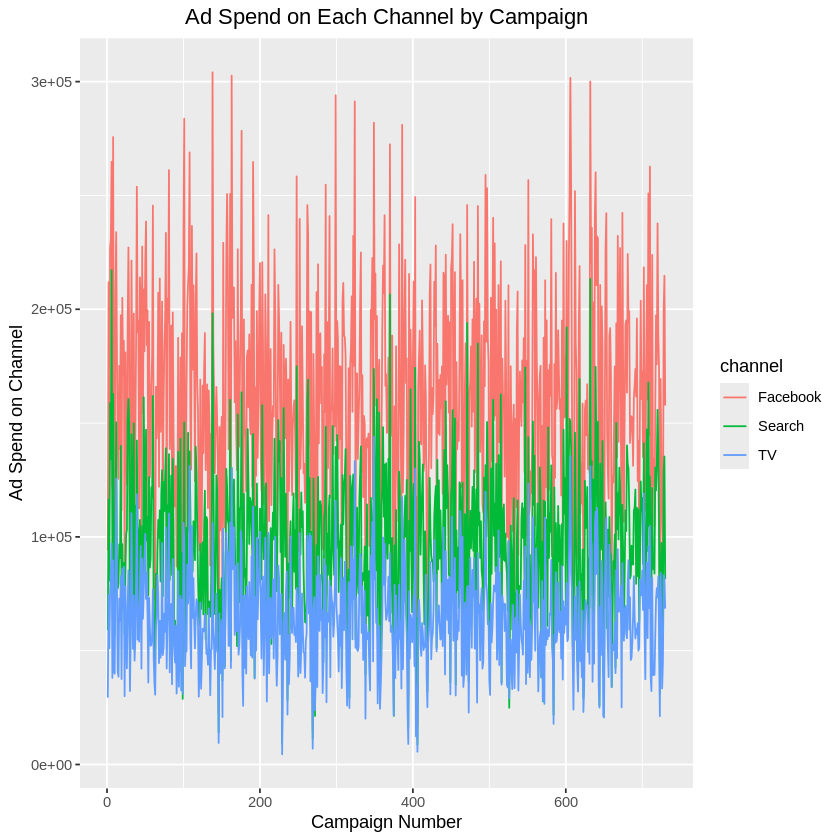

In [11]:
optional_step_2.5_plot_ad_spend(df_ads_step2 = df_ads_step2)

In [12]:
df_ads_step3 <- step_3_generate_media(
  my_variables = my_variables,
  df_ads_step2 = df_ads_step2,
  true_cpm = c(2, 20, NA),
  true_cpc = c(NA, NA, 0.25),
  mean_noisy_cpm_cpc = c(1, 0.05, 0.01),
  std_noisy_cpm_cpc = c(0.01, 0.15, 0.01)
)

[1] "You have completed running step 3: Simulating media variables."


In [13]:
df_ads_step4 <- step_4_generate_cvr(
  my_variables = my_variables,
  df_ads_step3 = df_ads_step3,
  mean_noisy_cvr = c(0, 0.0001, 0.0002),
  std_noisy_cvr = c(0.001, 0.002, 0.003)
  )

[1] "You have completed running step 4: Simulating conversion rates."


In [14]:
df_ads_step5a_before_mmm <- step_5a_pivot_to_mmm_format(
                    my_variables = my_variables,
                    df_ads_step4 = df_ads_step4
                    )

[1] "You have completed running step 5a: pivoting the data frame to an MMM format."


In [15]:
df_ads_step5b <- step_5b_decay(
  my_variables = my_variables,
  df_ads_step5a_before_mmm = df_ads_step5a_before_mmm,
  true_lambda_decay = c(0.1, 0.2, 0.3)
)

[1] "You have completed running step 5b: applying adstock decay."


In [ ]:
df_ads_step5c <- step_5c_diminishing_returns(
  my_variables = my_variables,
  df_ads_step5b = df_ads_step5b,
  alpha_saturation = c(2, 2, 2),
  gamma_saturation = c(0.1, 0.2, 0.3)
)

Streaming output truncated to the last 5000 lines.
Warning message in x^alpha_saturation:
“longer object length is not a multiple of shorter object length”
Warning message in x^alpha_saturation:
“longer object length is not a multiple of shorter object length”
Warning message in x^alpha_saturation + gammaTrans^alpha_saturation:
“longer object length is not a multiple of shorter object length”
Warning message in x^alpha_saturation:
“longer object length is not a multiple of shorter object length”
Warning message in x^alpha_saturation:
“longer object length is not a multiple of shorter object length”
Warning message in x^alpha_saturation + gammaTrans^alpha_saturation:
“longer object length is not a multiple of shorter object length”
Warning message in x^alpha_saturation:
“longer object length is not a multiple of shorter object length”
Warning message in x^alpha_saturation:
“longer object length is not a multiple of shorter object length”
Warning message in x^alpha_saturation + gammaTran

In [17]:
df_ads_step6 <- step_6_calculating_conversions(
  my_variables = my_variables,
  df_ads_step5c = df_ads_step5c
)

[1] "You have completed running step 6: Calculating the number of conversions."


In [18]:
df_ads_step7 <- step_7_expanded_df(
  my_variables = my_variables,
  df_ads_step6 = df_ads_step6,
  df_baseline = df_baseline
)

[1] "You have completed running step 7: Expanding to maximum data frame."


In [19]:
step_8_calculate_roi(
  my_variables = my_variables,
  df_ads_step7 = df_ads_step7
  )

[1] "roi of Facebook is: -0.627503282368521"
[1] "roi of TV is: -0.87172797466732"
[1] "roi of Search is: -0.983719760755903"


In [20]:
list_of_df_final <- step_9_final_df(
  my_variables = my_variables,
  df_ads_step7 = df_ads_step7
)


[1] "You have completed running step 9: Creating the final data frame. You have completed the simulation and should have two data frames ready to be used in an MMM. These two data frames are stored in a list. The first data frame is at the daily level; the second data frame is at a weekly level."


In [21]:
daily_df <- list_of_df_final[[1]]

In [22]:
weekly_df <- list_of_df_final[[2]]

In [23]:
daily_df

DATE,total_revenue,impressions_Facebook,impressions_TV,clicks_Search,spend_Facebook,spend_TV,spend_Search
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2017-01-01,422031.7,31407156,1474374,229873.1,93985.85,29371.95,59038.43
2017-01-02,676144.3,70508650,3723714,416642.5,211906.46,74499.64,116332.71
2017-01-03,591546.2,37952655,2519856,300880.3,114443.29,51103.50,80765.14
2017-01-04,643879.9,75210107,3777401,639414.7,226736.26,75500.43,158791.85
2017-01-05,627901.2,77767197,4220938,523006.7,230999.08,85157.37,134027.96
2017-01-06,540918.2,88188658,4854451,793136.3,264814.40,97023.35,217167.90
2017-01-07,709483.6,40517822,1895285,365083.5,122041.26,38057.67,88448.38
2017-01-08,751462.8,92206296,4422554,632765.6,275654.00,89653.04,162760.93
2017-01-09,871411.7,41262762,2058889,320179.8,123424.89,40695.82,82136.45


In [24]:
# prompt: save the df as a csv

write.csv(daily_df, file = "daily_df.csv")


In [25]:

write.csv(weekly_df, file = "weekly_df.csv")
